# 8.0 Chapter Introduction

### Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
kidney = pd.read_csv("../data/kidney.txt", delimiter=" ")

In [3]:
kidney.head()

,age,tot
0,18,2.44
1,19,3.86
2,19,-1.22
3,20,2.30
4,21,0.98


#### Get value for the subject with age 55

In [4]:
subj55 = kidney.loc[kidney.age == 55]
subj55

,age,tot
130,55,-0.01


#### Regression model

Fit the model

In [5]:
X = sm.add_constant(kidney.age)

In [6]:
model = sm.OLS(kidney.tot, X)
res = model.fit()

Get predictions, and look at $\hat{\text{tot}}$ for at age 55

In [7]:
yhat = res.predict(X)

In [8]:
yhat55 = yhat[kidney.age == 55].iloc[0]
yhat55.round(2)

-1.46

### Figure 8.1

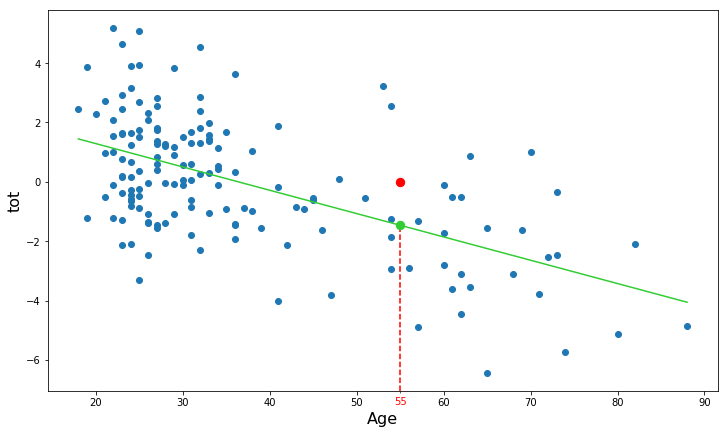

In [9]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.scatter(kidney.age, kidney.tot)
ax.plot(kidney.age, yhat, c="limegreen")

ax.scatter(subj55.age, subj55.tot, s=70, c="r")

ymin, ymax = ax.get_ybound()
ax.axvline(55, ymin=0, ymax=(yhat55 - ymin)/(ymax - ymin), c="r", linestyle="--", zorder=-1)
ax.scatter([55], [yhat55], s=70, c="limegreen")
ax.set_xticks([55], minor=True)
ax.set_xticklabels(["55"], minor=True, color="r")

ax.set_xlabel("Age", size=16)
ax.set_ylabel("tot", size=16);